# Self-Checkout Example (Gamma-Poisson family)

Import necessary modules:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import preliz as pz
from scipy import stats
plt.style.use('ggplot')

## Data

In [7]:
y = [6, 4, 0, 2, 3, 2, 4, 4, 6, 4]
np.mean(y), np.var(y)

(3.5, 3.05)

## Likelihood

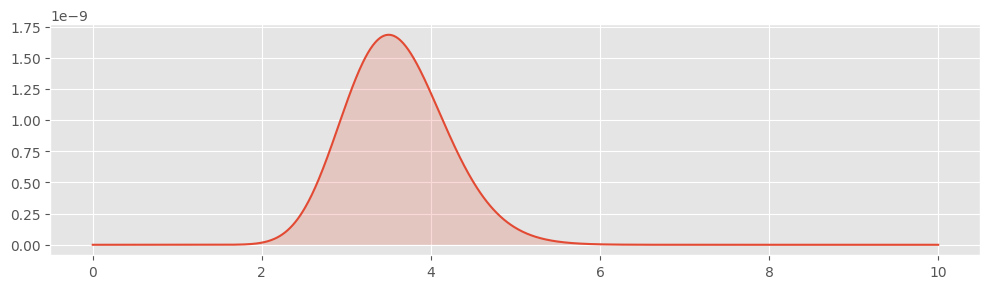

In [8]:
lbd_range = np.linspace(0,10,1000)
probs = [np.prod( stats.poisson.pmf(mu=lbd, k=y) ) for lbd in lbd_range]

plt.figure( figsize=(12,3) )
plt.plot( lbd_range, probs )
plt.fill_between( lbd_range, probs, alpha=0.2 )

### Prior

Prior expectation of an employee: on average a bit less than two people in queue, in general something between 0 and 4. Let's elicit a prior that reflects this opinion:

$E[\lambda] = \frac{s}{r} = 1.8 \quad \Rightarrow s = 1.8 r$

Tuning variance by ourselves:

s=1.8, r=1.0


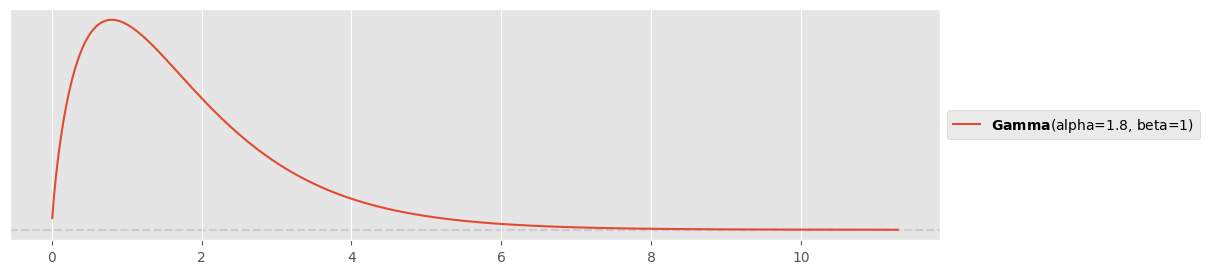

In [31]:
plt.figure( figsize=(12,3) )
r = 1.0
s= 1.8*r
pz.Gamma(s, r).plot_pdf()
print("s={}, r={}".format(s,r))

This is what is possible with a two-dimensional Gamma prior (parameterized by $s$ and $r$). A higher variance with the same mean is difficult to model.

Tuning the gamma distribution interactively:

In [29]:
pz.Gamma(45,37).plot_interactive()

interactive(children=(FloatSlider(value=45.0, description='alpha (0, inf)', max=140.0, min=2.220446049250313e-…

### Posterior

Update rule:

$$\text{Gamma}(s, r) \to \text{Gamma}(s+\sum_i y_i,\; r + n)$$

In [35]:
s, r

(1.8, 1.0)

In [36]:
s + np.sum(y), r + len(y)

(36.8, 11.0)

Plot prior and posterior:

<Axes: >

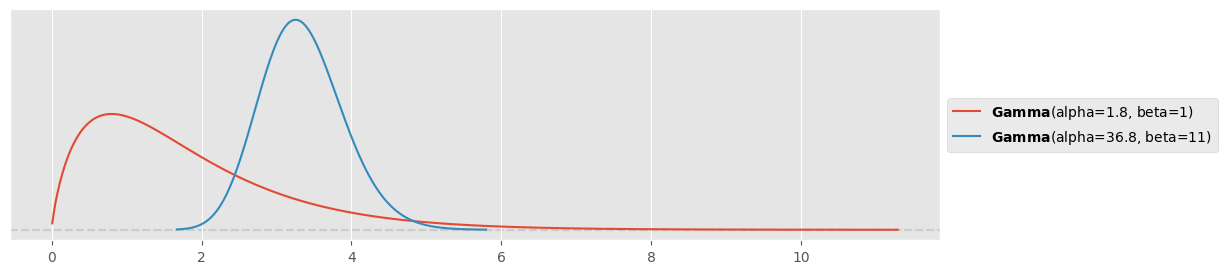

In [39]:
plt.figure( figsize=(12,3) )
pz.Gamma(s, r).plot_pdf()
pz.Gamma(s+np.sum(y), r+len(y)).plot_pdf()

Opinion has shifted towards higher numbers, uncertainty is just reduced by a bit.

Posterior standard deviation (almost symmetric):

In [41]:
pz.Gamma(s+np.sum(y), r+len(y)).std()

0.5514818504764764

Frequentist standard deviation (using standard error):

In [42]:
n = len(y)
sigma = np.sqrt( np.mean(y) )
sigma / np.sqrt( n )

0.5916079783099616

The frequentist standard deviation is slightly larger (no prior information).